# Data cleaning

In this notebook:

* Inspection of dataframes
* Identification and handling of missing values
* Usage of functions to clean columns
* Merging dataframes


* .describe(), .dtypes
* .isna().sum(), .fillna(), . dropna()
* .apply() and selection of functions based on existing list
* .merge()

In [2]:
import pandas as pd
import numpy as np

## Loading data

Two datasets:
* YouTube videos on climate change
* Sentiment analysis on titles of these videos (three scores, on Thursday you will learn what is wrong with that ;))

### What do we want to know?

* To what extent does the sentiment expressed in the title of the video influence user engagement (views, likes and dislikes)?
* To what extent does the sentiment expressed in the title of the video vary depending on the category in which the video is published?

**Important:** We only want to do this for videos published in 2018 till 2020. 

What do we need to do
1. **Inspect** datasets
2. Make sure we have the user engagement variables (**likes**, **dislikes**, and **views**)
3. Make sure we have a variable for the **category** of the video
4. Know **when the video was published**, and remove old videos
5. **Merge** the two datasets

In [5]:
videos = pd.read_csv('Datasets/YouTube_climatechange.tab')

ParserError: Error tokenizing data. C error: Expected 4 fields in line 3, saw 6


In [3]:
videos = pd.read_csv('Datasets/YouTube_climatechange.tab', sep='\t')
videos

,position,channelId,channelTitle,videoId,publishedAt,publishedAtSQL,videoTitle,videoDescription,videoCategoryId,videoCategoryLabel,...,dimension,definition,caption,thumbnail_maxres,licensedContent,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
0,1,UCIALMKvObZNtJ6AmdCLP7Lg,Bloomberg Markets and Finance,sGHq_EwXDn8,2020-01-24T04:15:28.000Z,2020-01-24 04:15:28,Australia’s Policies Going in Wrong Direction ...,"Jan.23 -- Michael Mann, distinguished professo...",25,News & Politics,...,2d,hd,False,https://i.ytimg.com/vi/sGHq_EwXDn8/maxresdefau...,1.0,2017,31.0,24.0,0,57.0
1,2,UCb1Ti1WKPauPpXkYKVHNpsw,LBC,PRtn1W2RAVU,2020-01-23T10:32:38.000Z,2020-01-23 10:32:38,Nigel Farage compares President Trump and Prin...,This is Nigel Farage's reaction to President T...,25,News & Politics,...,2d,hd,False,https://i.ytimg.com/vi/PRtn1W2RAVU/maxresdefau...,1.0,65633,1637.0,100.0,0,1093.0
2,3,UC-SJ6nODDmufqBzPBwCvYvQ,CBS This Morning,2CQvBGSiDvw,2019-12-23T13:38:55.000Z,2019-12-23 13:38:55,Climate change in the 2020s: What impacts to e...,"In our series The 2020's, we're exploring the ...",25,News & Politics,...,2d,hd,False,https://i.ytimg.com/vi/2CQvBGSiDvw/maxresdefau...,1.0,34455,646.0,97.0,0,618.0
3,4,UCcyq283he07B7_KUX07mmtA,Business Insider,Cbwv1jg4gZU,2020-01-22T22:28:34.000Z,2020-01-22 22:28:34,Solution To Climate Change Is To Make It Profi...,Environmental problems rose to the top of the ...,25,News & Politics,...,2d,hd,True,https://i.ytimg.com/vi/Cbwv1jg4gZU/maxresdefau...,1.0,24345,871.0,54.0,0,166.0
4,5,UCWafKqurzE49MzZ6eHFwXvQ,EconClips,cWsCX_yxXqw,2020-01-22T20:01:12.000Z,2020-01-22 20:01:12,🌤 Climate Change from the Economic Point of View,Climate change from the economic point of view...,27,Education,...,2d,hd,True,https://i.ytimg.com/vi/cWsCX_yxXqw/maxresdefau...,1.0,2085,129.0,23.0,0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,UC4-AGCUwX7C-D4BsBook9fQ,YAFTV,i-qBOyrD0-0,2019-10-05T23:34:52.000Z,2019-10-05 23:34:52,HOW DARE YOU: 10 reasons not to believe climat...,"Famous for her hard-hitting video segments, Li...",29,Nonprofits & Activism,...,2d,hd,False,NaN,NaN,550692,20821.0,702.0,0,6500.0
496,497,UCeo9P_uFXJOi4v0XvHczGRQ,wocomoDOCS,itgNMmhcXPA,2016-06-23T08:00:01.000Z,2016-06-23 08:00:01,Global warming and wine | Viticulture and Clim...,Global warming could drastically alter the wor...,27,Education,...,2d,hd,False,https://i.ytimg.com/vi/itgNMmhcXPA/maxresdefau...,1.0,28587,194.0,11.0,0,23.0
497,498,UCqKnDDavIqBKZuvgQtYAJsA,Future Thinkers,58xtN6Dw8kw,2017-09-08T09:59:08.000Z,2017-09-08 09:59:08,7 Ways Blockchain Can Stop Climate Change & Sa...,The blockchain is the technology that underlie...,28,Science & Technology,...,2d,hd,False,https://i.ytimg.com/vi/58xtN6Dw8kw/maxresdefau...,1.0,35771,861.0,20.0,0,59.0
498,499,UCD_DaKNac0Ta-2PeHuoQ1uA,Senator Bernie Sanders,-wCcQE0eLbM,2018-12-04T02:26:34.000Z,2018-12-04 02:26:34,Climate Change Town Hall,Sen. Bernie Sanders hosts a national town hall...,25,News & Politics,...,2d,hd,False,NaN,NaN,27003,1544.0,90.0,0,282.0


## Data exploration

In [8]:
len(videos)

500

In [9]:
videos.head()

,position,channelId,channelTitle,videoId,publishedAt,publishedAtSQL,videoTitle,videoDescription,videoCategoryId,videoCategoryLabel,...,dimension,definition,caption,thumbnail_maxres,licensedContent,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
0,1,UCIALMKvObZNtJ6AmdCLP7Lg,Bloomberg Markets and Finance,sGHq_EwXDn8,2020-01-24T04:15:28.000Z,2020-01-24 04:15:28,Australia’s Policies Going in Wrong Direction ...,"Jan.23 -- Michael Mann, distinguished professo...",25,News & Politics,...,2d,hd,False,https://i.ytimg.com/vi/sGHq_EwXDn8/maxresdefau...,1.0,2017,31.0,24.0,0,57.0
1,2,UCb1Ti1WKPauPpXkYKVHNpsw,LBC,PRtn1W2RAVU,2020-01-23T10:32:38.000Z,2020-01-23 10:32:38,Nigel Farage compares President Trump and Prin...,This is Nigel Farage's reaction to President T...,25,News & Politics,...,2d,hd,False,https://i.ytimg.com/vi/PRtn1W2RAVU/maxresdefau...,1.0,65633,1637.0,100.0,0,1093.0
2,3,UC-SJ6nODDmufqBzPBwCvYvQ,CBS This Morning,2CQvBGSiDvw,2019-12-23T13:38:55.000Z,2019-12-23 13:38:55,Climate change in the 2020s: What impacts to e...,"In our series The 2020's, we're exploring the ...",25,News & Politics,...,2d,hd,False,https://i.ytimg.com/vi/2CQvBGSiDvw/maxresdefau...,1.0,34455,646.0,97.0,0,618.0
3,4,UCcyq283he07B7_KUX07mmtA,Business Insider,Cbwv1jg4gZU,2020-01-22T22:28:34.000Z,2020-01-22 22:28:34,Solution To Climate Change Is To Make It Profi...,Environmental problems rose to the top of the ...,25,News & Politics,...,2d,hd,True,https://i.ytimg.com/vi/Cbwv1jg4gZU/maxresdefau...,1.0,24345,871.0,54.0,0,166.0
4,5,UCWafKqurzE49MzZ6eHFwXvQ,EconClips,cWsCX_yxXqw,2020-01-22T20:01:12.000Z,2020-01-22 20:01:12,🌤 Climate Change from the Economic Point of View,Climate change from the economic point of view...,27,Education,...,2d,hd,True,https://i.ytimg.com/vi/cWsCX_yxXqw/maxresdefau...,1.0,2085,129.0,23.0,0,74.0


In [10]:
videos.columns

Index(['position', 'channelId', 'channelTitle', 'videoId', 'publishedAt',
       'publishedAtSQL', 'videoTitle', 'videoDescription', 'videoCategoryId',
       'videoCategoryLabel', 'duration', 'durationSec', 'dimension',
       'definition', 'caption', 'thumbnail_maxres', 'licensedContent',
       'viewCount', 'likeCount', 'dislikeCount', 'favoriteCount',
       'commentCount'],
      dtype='object')

In [11]:
videos.describe()

,position,videoCategoryId,durationSec,licensedContent,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
count,500.000000,500.000000,500.000000,361.0,5.000000e+02,487.000000,487.000000,500.0,452.000000
mean,250.500000,25.666000,673.624000,1.0,3.370684e+05,6849.008214,1146.439425,0.0,2029.535398
std,144.481833,3.031968,703.703284,0.0,8.991955e+05,17441.571604,6519.772674,0.0,5616.323412
min,1.000000,1.000000,15.000000,1.0,1.900000e+01,0.000000,0.000000,0.0,0.000000
25%,125.750000,25.000000,242.500000,1.0,1.456550e+04,181.000000,26.500000,0.0,58.000000
50%,250.500000,25.000000,406.500000,1.0,5.884900e+04,907.000000,116.000000,0.0,452.000000
75%,375.250000,28.000000,813.750000,1.0,2.605585e+05,4555.500000,483.000000,0.0,1539.750000
max,500.000000,29.000000,3574.000000,1.0,1.208920e+07,167789.000000,113733.000000,0.0,88424.000000


In [12]:
videos.isna().sum()

position                0
channelId               0
channelTitle            0
videoId                 0
publishedAt             0
publishedAtSQL          0
videoTitle              0
videoDescription        5
videoCategoryId         0
videoCategoryLabel      0
duration                0
durationSec             0
dimension               0
definition              0
caption                 0
thumbnail_maxres       94
licensedContent       139
viewCount               0
likeCount              13
dislikeCount           13
favoriteCount           0
commentCount           48
dtype: int64

# Data cleaning

### Missing values

In [13]:
videos.isna().sum()

position                0
channelId               0
channelTitle            0
videoId                 0
publishedAt             0
publishedAtSQL          0
videoTitle              0
videoDescription        5
videoCategoryId         0
videoCategoryLabel      0
duration                0
durationSec             0
dimension               0
definition              0
caption                 0
thumbnail_maxres       94
licensedContent       139
viewCount               0
likeCount              13
dislikeCount           13
favoriteCount           0
commentCount           48
dtype: int64

In [14]:
videos[['likeCount', 'dislikeCount']].describe()

,likeCount,dislikeCount
count,487.000000,487.000000
mean,6849.008214,1146.439425
std,17441.571604,6519.772674
min,0.000000,0.000000
25%,181.000000,26.500000
50%,907.000000,116.000000
75%,4555.500000,483.000000
max,167789.000000,113733.000000


The minimum value is 0, so probably something else is going on. Let's see if this is related to channels (e.g., some channels not allowing users to like videos, perhaps?).

In [15]:
videos[videos['likeCount'].isna()]['channelTitle'].value_counts()

Intergovernmental Panel on Climate Change (IPCC)                 4
Food and Agriculture Organization of the United Nations          3
The Lancet                                                       1
ESB                                                              1
Insight SBS                                                      1
Climate-KIC                                                      1
The National Academies of Sciences, Engineering, and Medicine    1
BBC News Hindi                                                   1
Name: channelTitle, dtype: int64

In [16]:
channels_with_likes = videos[videos['likeCount'].isna()==False]['channelTitle'].unique().tolist()

In [17]:
channels_with_likes

['Bloomberg Markets and Finance',
 'LBC',
 'CBS This Morning',
 'Business Insider',
 'EconClips',
 'Sky News Australia',
 'CNBC International',
 'ITV News',
 'Discovery',
 'CBS News',
 'National Geographic',
 'BBC Newsnight',
 'Valuetainment',
 'DW News',
 'CNN',
 'The Royal Family Channel',
 'The Telegraph',
 'QuickTake by Bloomberg',
 'European Space Agency, ESA',
 'C-SPAN',
 'GWPF',
 'NDTV',
 'The Sun',
 'WIRED',
 'TEDx Talks',
 'DW Documentary',
 'Washington Post',
 'Global News',
 'NBC News',
 'Sky News',
 'ABC News (Australia)',
 'Bozeman Science',
 'CNBC International TV',
 'ABC News',
 'Siemens',
 'Vox',
 'Centre for Effective Altruism',
 'Al Jazeera English',
 'Simon Clark',
 'Crash Course Kids',
 'SciShow',
 'VideoFromSpace',
 'The Guardian',
 'Hot Mess',
 'Veritasium',
 "It's Okay To Be Smart",
 'CNBC',
 'NASA Goddard',
 'edX',
 'AFP News Agency',
 'Guardian News',
 'TED Archive',
 'LastWeekTonight',
 'U.S. Environmental Protection Agency',
 'Met Office - Weather',
 'The Eco

Using "in" operator we can check if an element is present in a list.

In [18]:
'Intergovernmental Panel on Climate Change (IPCC)' in channels_with_likes

False

In [19]:
'The Lancet' in channels_with_likes

False

If I wanted to substitute them by another value, I would use the following command:

In [20]:
#Fill NA's with 0
videos['dislikeCount_no_na'] = videos['dislikeCount'].fillna(0)

In [21]:
videos.isna().sum()

position                0
channelId               0
channelTitle            0
videoId                 0
publishedAt             0
publishedAtSQL          0
videoTitle              0
videoDescription        5
videoCategoryId         0
videoCategoryLabel      0
duration                0
durationSec             0
dimension               0
definition              0
caption                 0
thumbnail_maxres       94
licensedContent       139
viewCount               0
likeCount              13
dislikeCount           13
favoriteCount           0
commentCount           48
dislikeCount_no_na      0
dtype: int64

In [22]:
#Drop rows with NA
videos = videos.dropna(subset=['likeCount', 'dislikeCount'])

In [23]:
videos.isna().sum()

position                0
channelId               0
channelTitle            0
videoId                 0
publishedAt             0
publishedAtSQL          0
videoTitle              0
videoDescription        5
videoCategoryId         0
videoCategoryLabel      0
duration                0
durationSec             0
dimension               0
definition              0
caption                 0
thumbnail_maxres       93
licensedContent       128
viewCount               0
likeCount               0
dislikeCount            0
favoriteCount           0
commentCount           36
dislikeCount_no_na      0
dtype: int64

In [24]:
len(videos)

487

## Filter on date - "recoding" a column

In [25]:
videos.dtypes

position                int64
channelId              object
channelTitle           object
videoId                object
publishedAt            object
publishedAtSQL         object
videoTitle             object
videoDescription       object
videoCategoryId         int64
videoCategoryLabel     object
duration               object
durationSec             int64
dimension              object
definition             object
caption                  bool
thumbnail_maxres       object
licensedContent       float64
viewCount               int64
likeCount             float64
dislikeCount          float64
favoriteCount           int64
commentCount          float64
dislikeCount_no_na    float64
dtype: object

From my key variables so far (likeCount, dislikeCount, videoTitle, videoCategoryLabel), all looks OK. The numeric variables are in numeric form (int or float), and the text variables are in object form.

But the date variable (publishedAt) is stored as an object... and it should be a date.

In [26]:
videos['publishedAt'].head()

0    2020-01-24T04:15:28.000Z
1    2020-01-23T10:32:38.000Z
2    2019-12-23T13:38:55.000Z
3    2020-01-22T22:28:34.000Z
4    2020-01-22T20:01:12.000Z
Name: publishedAt, dtype: object

In [27]:
#Apply a funcation to a column
videos['publishedAt'] = videos['publishedAt'].apply(pd.to_datetime)

<ipython-input-27-a45418e9b2c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  videos['publishedAt'] = videos['publishedAt'].apply(pd.to_datetime)


In [28]:
videos['publishedAt'].head()

0   2020-01-24 04:15:28+00:00
1   2020-01-23 10:32:38+00:00
2   2019-12-23 13:38:55+00:00
3   2020-01-22 22:28:34+00:00
4   2020-01-22 20:01:12+00:00
Name: publishedAt, dtype: datetime64[ns, UTC]

In [29]:
videos.dtypes

position                            int64
channelId                          object
channelTitle                       object
videoId                            object
publishedAt           datetime64[ns, UTC]
publishedAtSQL                     object
videoTitle                         object
videoDescription                   object
videoCategoryId                     int64
videoCategoryLabel                 object
duration                           object
durationSec                         int64
dimension                          object
definition                         object
caption                              bool
thumbnail_maxres                   object
licensedContent                   float64
viewCount                           int64
likeCount                         float64
dislikeCount                      float64
favoriteCount                       int64
commentCount                      float64
dislikeCount_no_na                float64
dtype: object

Now we can filter based on publication date

In [30]:
videos[videos['publishedAt'] >'2018-12-31']

,position,channelId,channelTitle,videoId,publishedAt,publishedAtSQL,videoTitle,videoDescription,videoCategoryId,videoCategoryLabel,...,definition,caption,thumbnail_maxres,licensedContent,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,dislikeCount_no_na
0,1,UCIALMKvObZNtJ6AmdCLP7Lg,Bloomberg Markets and Finance,sGHq_EwXDn8,2020-01-24 04:15:28+00:00,2020-01-24 04:15:28,Australia’s Policies Going in Wrong Direction ...,"Jan.23 -- Michael Mann, distinguished professo...",25,News & Politics,...,hd,False,https://i.ytimg.com/vi/sGHq_EwXDn8/maxresdefau...,1.0,2017,31.0,24.0,0,57.0,24.0
1,2,UCb1Ti1WKPauPpXkYKVHNpsw,LBC,PRtn1W2RAVU,2020-01-23 10:32:38+00:00,2020-01-23 10:32:38,Nigel Farage compares President Trump and Prin...,This is Nigel Farage's reaction to President T...,25,News & Politics,...,hd,False,https://i.ytimg.com/vi/PRtn1W2RAVU/maxresdefau...,1.0,65633,1637.0,100.0,0,1093.0,100.0
2,3,UC-SJ6nODDmufqBzPBwCvYvQ,CBS This Morning,2CQvBGSiDvw,2019-12-23 13:38:55+00:00,2019-12-23 13:38:55,Climate change in the 2020s: What impacts to e...,"In our series The 2020's, we're exploring the ...",25,News & Politics,...,hd,False,https://i.ytimg.com/vi/2CQvBGSiDvw/maxresdefau...,1.0,34455,646.0,97.0,0,618.0,97.0
3,4,UCcyq283he07B7_KUX07mmtA,Business Insider,Cbwv1jg4gZU,2020-01-22 22:28:34+00:00,2020-01-22 22:28:34,Solution To Climate Change Is To Make It Profi...,Environmental problems rose to the top of the ...,25,News & Politics,...,hd,True,https://i.ytimg.com/vi/Cbwv1jg4gZU/maxresdefau...,1.0,24345,871.0,54.0,0,166.0,54.0
4,5,UCWafKqurzE49MzZ6eHFwXvQ,EconClips,cWsCX_yxXqw,2020-01-22 20:01:12+00:00,2020-01-22 20:01:12,🌤 Climate Change from the Economic Point of View,Climate change from the economic point of view...,27,Education,...,hd,True,https://i.ytimg.com/vi/cWsCX_yxXqw/maxresdefau...,1.0,2085,129.0,23.0,0,74.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,487,UCGJq0eQZoFSwgcqgxIE9MHw,Mic the Vegan,U3r-TzeSzrc,2019-07-03 22:04:27+00:00,2019-07-03 22:04:27,Top 5 Climate Change Myths Debunked,The top 5 myths and fallacies used to fuel cli...,22,People & Blogs,...,hd,False,https://i.ytimg.com/vi/U3r-TzeSzrc/maxresdefau...,1.0,41065,3441.0,263.0,0,1201.0,263.0
487,488,UCq18eeL7D9Vd8DhjMcLh9QQ,Good Morning Britain,8ISePLL1wcw,2019-10-09 10:45:49+00:00,2019-10-09 10:45:49,Piers Clashes With Extinction Rebellion Co-Lea...,There have been over 600 arrests since Monday ...,24,Entertainment,...,hd,False,https://i.ytimg.com/vi/8ISePLL1wcw/maxresdefau...,1.0,946443,17005.0,2214.0,0,NaN,2214.0
490,491,UCqBJ47FjJcl61fmSbcadAVg,NTV Kenya,w38fhmZkz64,2020-01-24 19:14:24+00:00,2020-01-24 19:14:24,"Eldoret City Marathon themed ""mitigating clima...",#NTVTonight #NTVKenya #NTVNews A rallying call...,25,News & Politics,...,hd,False,https://i.ytimg.com/vi/w38fhmZkz64/maxresdefau...,1.0,170,1.0,0.0,0,0.0,0.0
493,494,UCZWlSUNDvCCS1hBiXV0zKcA,PragerU,ZgdTHVcv1o8,2019-08-14 01:07:07+00:00,2019-08-14 01:07:07,The Government Can't Solve Climate Change,Can politicians resolve major environmental is...,27,Education,...,hd,True,https://i.ytimg.com/vi/ZgdTHVcv1o8/maxresdefau...,1.0,619592,17725.0,846.0,0,3493.0,846.0


In [31]:
videos['publishedAt'].min()

Timestamp('2007-01-12 20:59:37+0000', tz='UTC')

In [32]:
videos['publishedAt'].max()

Timestamp('2020-01-25 07:28:30+0000', tz='UTC')

In [33]:
len(videos)

487

In [34]:
len(videos[videos['publishedAt'] >'2017-12-31'])

292

In [35]:
videos = videos[videos['publishedAt'] >'2017-12-31']

## Operations on columns

### Changing data type


In [62]:
sentiment = pd.read_csv('Datasets/Sentiment_YouTubeClimateChange.csv')

In [67]:
#Disclaimer - very crude measure, more on it on Thursday!
sentiment.head()

,Unnamed: 0,videoId,negative,positive,neutral,overall
0,0,sGHq_EwXDn8,-1,1,0,0
1,1,PRtn1W2RAVU,-1,1,0,0
2,2,2CQvBGSiDvw,-1,1,0,0
3,3,Cbwv1jg4gZU,-1,1,0,0
4,4,cWsCX_yxXqw,-1,1,0,0


In [57]:
sentiment.dtypes

videoId     object
text        object
negative     int64
positive    object
neutral     object
dtype: object

In [58]:
sentiment.describe()

,negative
count,244.000000
mean,-1.340164
std,0.669028
min,-4.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,-1.000000


All columns are objects. Do we need to do anything with that?

In [42]:
sentiment.isna().sum()

videoId     0
text        0
negative    0
positive    0
neutral     0
dtype: int64

In [64]:
sentiment["negative"] = pd.to_numeric(sentiment["negative"])
sentiment["positive"] = pd.to_numeric(sentiment["positive"])

In [65]:
sentiment['overall'] = sentiment['negative'] + sentiment['positive']

In [66]:
sentiment['overall'].describe()

count    244.000000
mean      -0.286885
std        0.690673
min       -3.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: overall, dtype: float64

### Applying functions and recoding categorical variables

In [69]:
videos['videoCategoryLabel'].value_counts()

News & Politics          163
Science & Technology      31
Education                 30
Nonprofits & Activism     21
Entertainment             17
People & Blogs            16
Comedy                    10
Autos & Vehicles           1
Music                      1
Film & Animation           1
Travel & Events            1
Name: videoCategoryLabel, dtype: int64

In [71]:
def recategorize(category):
    if category == 'News & Politics':
        return category
    if category == 'Education':
        return 'Education, Science and Technology'
    if category == 'Science & Technology':
        return 'Education, Science and Technology'
    if category == 'Nonprofits & Activism':
        return category
    else:
        return 'Other'
    

In [72]:
videos['category'] = videos['videoCategoryLabel'].apply(recategorize)

In [73]:
videos['category'].value_counts()

News & Politics                      163
Education, Science and Technology     61
Other                                 47
Nonprofits & Activism                 21
Name: category, dtype: int64

In [84]:
videos[['category', 'favoriteCount', 'commentCount', 'dislikeCount_no_na']].groupby('category').agg(np.mean)

,favoriteCount,commentCount,dislikeCount_no_na
category,,,
"Education, Science and Technology",0,1715.135593,700.229508
News & Politics,0,2197.986577,1829.233129
Nonprofits & Activism,0,1482.047619,772.000000
Other,0,2590.302326,1191.638298


<AxesSubplot:xlabel='category'>

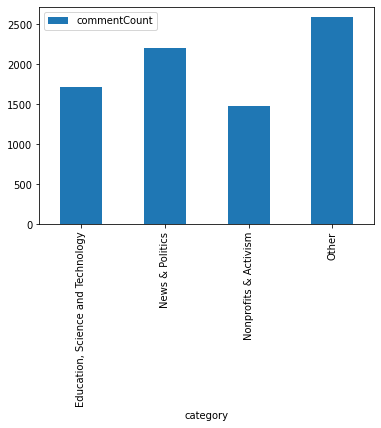

In [88]:
videos[['commentCount','category']].groupby('category').agg(np.mean).plot(kind='bar')

In [81]:
videos.columns

Index(['position', 'channelId', 'channelTitle', 'videoId', 'publishedAt',
       'publishedAtSQL', 'videoTitle', 'videoDescription', 'videoCategoryId',
       'videoCategoryLabel', 'duration', 'durationSec', 'dimension',
       'definition', 'caption', 'thumbnail_maxres', 'licensedContent',
       'viewCount', 'likeCount', 'dislikeCount', 'favoriteCount',
       'commentCount', 'dislikeCount_no_na', 'category'],
      dtype='object')

# Afternoon

## Merging the dataframes

A few important tips:
* Make sure that you have one unique identifier (column) that is available in both dataframes
* Make sure that the unique identifier column has the same name in both dataframes
* Make sure that the unique identifier column is of the same data type in both dataframes

In [43]:
videos.columns

Index(['position', 'channelId', 'channelTitle', 'videoId', 'publishedAt',
       'publishedAtSQL', 'videoTitle', 'videoDescription', 'videoCategoryId',
       'videoCategoryLabel', 'duration', 'durationSec', 'dimension',
       'definition', 'caption', 'thumbnail_maxres', 'licensedContent',
       'viewCount', 'likeCount', 'dislikeCount', 'favoriteCount',
       'commentCount', 'dislikeCount_no_na'],
      dtype='object')

In [44]:
sentiment.columns

Index(['videoId', 'text', 'negative', 'positive', 'neutral'], dtype='object')

In [45]:
videos.dtypes

position                            int64
channelId                          object
channelTitle                       object
videoId                            object
publishedAt           datetime64[ns, UTC]
publishedAtSQL                     object
videoTitle                         object
videoDescription                   object
videoCategoryId                     int64
videoCategoryLabel                 object
duration                           object
durationSec                         int64
dimension                          object
definition                         object
caption                              bool
thumbnail_maxres                   object
licensedContent                   float64
viewCount                           int64
likeCount                         float64
dislikeCount                      float64
favoriteCount                       int64
commentCount                      float64
dislikeCount_no_na                float64
dtype: object

In [46]:
sentiment.dtypes

videoId     object
text        object
negative    object
positive    object
neutral     object
dtype: object

OK, the column is available in both, and seems to be of the same data type. So I can merge.

In [47]:
len(videos)

292

In [48]:
len(sentiment)

244

In [51]:
len(videos.merge(sentiment, on='videoId', how='left'))

292

In [52]:
len(videos.merge(sentiment, on='videoId', how='right'))

244

In [53]:
len(videos.merge(sentiment, on='videoId', how='inner'))

244

In [54]:
len(videos.merge(sentiment, on='videoId', how='outer'))

292

In [56]:
videos_sent = videos.merge(sentiment, on='videoId')

## Writing the merged file

In [77]:
videos_sent.to_pickle('videos_sent.pkl')

## Aggregation

In [103]:
videos[['videoCategoryLabel', 'commentCount', 'dislikeCount_no_na']].groupby('videoCategoryLabel').agg([np.mean, sum])

commentCount           dislikeCount_no_na          
                              mean       sum               mean       sum
videoCategoryLabel                                                       
Autos & Vehicles        469.000000     469.0         104.000000     104.0
Comedy                 4105.300000   41053.0        2162.400000   21624.0
Education              1457.862069   42278.0         546.000000   16380.0
Entertainment          4290.230769   55773.0        1845.941176   31381.0
Film & Animation         26.000000      26.0          20.000000      20.0
Music                   564.000000     564.0          64.000000      64.0
News & Politics        2197.986577  327500.0        1829.233129  298165.0
Nonprofits & Activism  1482.047619   31123.0         772.000000   16212.0
People & Blogs          843.625000   13498.0         175.875000    2814.0
Science & Technology   1963.833333   58915.0         849.483871   26334.0
Travel & Events           0.000000       0.0           0.000000       0.0

<AxesSubplot:xlabel='videoCategoryLabel'>

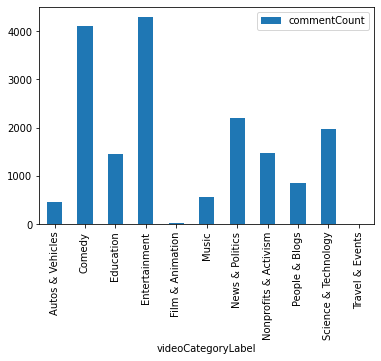

In [94]:
videos[['commentCount','videoCategoryLabel']].groupby('videoCategoryLabel').agg(np.mean).plot(kind='bar')

In [91]:
videos.columns

Index(['position', 'channelId', 'channelTitle', 'videoId', 'publishedAt',
       'publishedAtSQL', 'videoTitle', 'videoDescription', 'videoCategoryId',
       'videoCategoryLabel', 'duration', 'durationSec', 'dimension',
       'definition', 'caption', 'thumbnail_maxres', 'licensedContent',
       'viewCount', 'likeCount', 'dislikeCount', 'favoriteCount',
       'commentCount', 'dislikeCount_no_na', 'category'],
      dtype='object')

In [96]:
#Create a new column for month
videos['month'] = videos['publishedAt'].dt.strftime('%Y-%m')


<AxesSubplot:xlabel='month'>

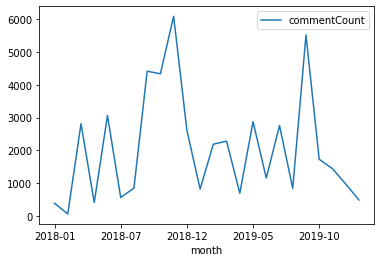

In [100]:
videos[['commentCount','month']].groupby('month').agg(np.mean).plot()